# Implementing the Continuous Bag of Words (CBOW) Model

## installing libraries

In [ ]:
# !pip install numpy
# !pip install pandas
# !pip install keras

## import the necessary packages

In [ ]:
import numpy as np
import pandas as pd
from keras.backend import mean
from keras.layers import Dense, Embedding, Lambda
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.utils import to_categorical

## import the text data from input file

In [ ]:
# input_file content
"""
The speed of transmission is an important point of difference between the two viruses. Influenza has a shorter median incubation period (the time from infection to appearance of symptoms) and a shorter serial interval (the time between successive cases) than COVID-19 virus. The serial interval for COVID-19 virus is estimated to be 5-6 days, while for influenza virus, the serial interval is 3 days. This means that influenza can spread faster than COVID-19.

Further, transmission in the first 3-5 days of illness, or potentially pre-symptomatic transmission –transmission of the virus before the appearance of symptoms – is a major driver of transmission for influenza. In contrast, while we are learning that there are people who can shed COVID-19 virus 24-48 hours prior to symptom onset, at present, this does not appear to be a major driver of transmission.

The reproductive number – the number of secondary infections generated from one infected individual – is understood to be between 2 and 2.5 for COVID-19 virus, higher than for influenza. However, estimates for both COVID-19 and influenza viruses are very context and time-specific, making direct comparisons more difficult.
"""

input_file = open("./input_file.txt", "r")
text_data = [text for text in input_file if text.count(" ") >= 2]
print(text_data)

['The speed of transmission is an important point of difference between the two viruses. Influenza has a shorter median incubation period (the time from infection to appearance of symptoms) and a shorter serial interval (the time between successive cases) than COVID-19 virus. The serial interval for COVID-19 virus is estimated to be 5-6 days, while for influenza virus, the serial interval is 3 days. This means that influenza can spread faster than COVID-19.\n', 'Further, transmission in the first 3-5 days of illness, or potentially pre-symptomatic transmission –transmission of the virus before the appearance of symptoms – is a major driver of transmission for influenza. In contrast, while we are learning that there are people who can shed COVID-19 virus 24-48 hours prior to symptom onset, at present, this does not appear to be a major driver of transmission.\n', 'The reproductive number – the number of secondary infections generated from one infected individual – is understood to be be

## tokenize every word in the dataset and fit data to the tokenizer

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_data)

word_ids = tokenizer.texts_to_sequences(text_data)
print(word_ids)

word_to_id_map = tokenizer.word_index
print(word_to_id_map)

id_to_word_map = {v: k for k, v in word_to_id_map.items()}
print(id_to_word_map)

word_count = sum(len(s) for s in word_ids)
vocab_size = len(word_to_id_map) + 1
embed_size = 100
window_size = 2

print("Word Count:", word_count)
print("Vocabulary Size:", vocab_size)
print("Vocabulary Sample:", list(word_to_id_map.items())[:10])

[[1, 38, 2, 8, 9, 39, 40, 41, 2, 42, 13, 1, 43, 23, 3, 44, 11, 24, 45, 46, 47, 1, 14, 25, 48, 10, 26, 2, 27, 12, 11, 24, 15, 16, 1, 14, 13, 49, 50, 17, 4, 5, 6, 1, 15, 16, 7, 4, 5, 6, 9, 51, 10, 18, 19, 52, 20, 28, 7, 3, 6, 1, 15, 16, 9, 29, 20, 30, 53, 31, 3, 32, 54, 55, 17, 4, 5], [56, 8, 33, 1, 57, 29, 19, 20, 2, 58, 59, 60, 61, 62, 8, 63, 2, 1, 6, 64, 1, 26, 2, 27, 21, 9, 11, 34, 35, 2, 8, 7, 3, 33, 65, 28, 66, 22, 67, 31, 68, 22, 69, 70, 32, 71, 4, 5, 6, 72, 73, 74, 75, 10, 76, 77, 78, 79, 30, 80, 81, 82, 10, 18, 11, 34, 35, 2, 8], [1, 83, 36, 21, 1, 36, 2, 84, 85, 86, 25, 87, 88, 89, 21, 9, 90, 10, 18, 13, 37, 12, 37, 19, 7, 4, 5, 6, 91, 17, 7, 3, 92, 93, 7, 94, 4, 5, 12, 3, 23, 22, 95, 96, 12, 14, 97, 98, 99, 100, 101, 102]]
{'the': 1, 'of': 2, 'influenza': 3, 'covid': 4, '19': 5, 'virus': 6, 'for': 7, 'transmission': 8, 'is': 9, 'to': 10, 'a': 11, 'and': 12, 'between': 13, 'time': 14, 'serial': 15, 'interval': 16, 'than': 17, 'be': 18, '5': 19, 'days': 20, '–': 21, 'are': 22, '

## function to generate (context word, label word) pairs

In [ ]:
def cbow_model(data, window_size, vocab_size):
    context_length = window_size * 2
    for text in data:
        text_length = len(text)
        for idx, word in enumerate(text):
            context_text = []
            label_word = []

            start = idx - window_size
            end = idx + window_size + 1

            context_text.append(
                [
                    text[i]
                    for i in range(start, end)
                    if 0 <= i < text_length and i != idx
                ]
            )
            label_word.append(word)

            x = pad_sequences(context_text, maxlen=context_length)
            y = to_categorical(label_word, vocab_size)
            yield (x, y)

In [ ]:
i = 0
for x, y in cbow_model(data=word_ids, window_size=window_size, vocab_size=vocab_size):
    if 0 not in x[0]:
        print(
            "Context (X):",
            [id_to_word_map[w] for w in x[0]],
            "-> Target (Y):",
            id_to_word_map[np.argwhere(y[0])[0][0]],
        )

        if i == 10:
            break
        i += 1

Context (X): ['the', 'speed', 'transmission', 'is'] -> Target (Y): of
Context (X): ['speed', 'of', 'is', 'an'] -> Target (Y): transmission
Context (X): ['of', 'transmission', 'an', 'important'] -> Target (Y): is
Context (X): ['transmission', 'is', 'important', 'point'] -> Target (Y): an
Context (X): ['is', 'an', 'point', 'of'] -> Target (Y): important
Context (X): ['an', 'important', 'of', 'difference'] -> Target (Y): point
Context (X): ['important', 'point', 'difference', 'between'] -> Target (Y): of
Context (X): ['point', 'of', 'between', 'the'] -> Target (Y): difference
Context (X): ['of', 'difference', 'the', 'two'] -> Target (Y): between
Context (X): ['difference', 'between', 'two', 'viruses'] -> Target (Y): the
Context (X): ['between', 'the', 'viruses', 'influenza'] -> Target (Y): two


## build the CBOW model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 100)            10300     
                                                                 
 lambda (Lambda)             (None, 100)               0         
                                                                 
 dense (Dense)               (None, 103)               10403     
                                                                 
Total params: 20703 (80.87 KB)
Trainable params: 20703 (80.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


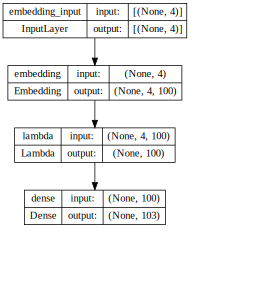

In [ ]:
cbow = Sequential()
cbow.add(
    Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size * 2)
)
cbow.add(Lambda(lambda x: mean(x, axis=1), output_shape=(embed_size)))
cbow.add(Dense(vocab_size, activation="softmax"))
cbow.compile(loss="categorical_crossentropy", optimizer="rmsprop")

print(cbow.summary())

from IPython.display import SVG
from keras.utils import model_to_dot

SVG(model_to_dot(cbow, show_shapes=True, show_layer_names=True, rankdir="TB").create(
    prog="dot", format="svg"))

In [ ]:
for epoch in range(1, 11):
    loss = 0.0
    for x, y in cbow_model(data=word_ids, window_size=window_size, vocab_size=vocab_size):
        loss += cbow.train_on_batch(x, y)

    print("Epoch:", epoch, "\tLoss:", loss)

Epoch: 1 	Loss: 916.6858558654785
Epoch: 2 	Loss: 902.4476752281189
Epoch: 3 	Loss: 887.0675990581512
Epoch: 4 	Loss: 869.3559384346008
Epoch: 5 	Loss: 849.5490753650665
Epoch: 6 	Loss: 828.9646286964417
Epoch: 7 	Loss: 809.2348103523254
Epoch: 8 	Loss: 791.2246149778366
Epoch: 9 	Loss: 774.8088864088058
Epoch: 10 	Loss: 759.4513930082321


## display the weights

In [ ]:
weights = cbow.get_weights()[0]

weights = weights[1:]
print(weights.shape)

pd.DataFrame(weights, index=list(id_to_word_map.values())).head()

(102, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
the,-0.001457,0.236298,0.205402,0.219881,0.046929,0.288547,-0.017311,0.147649,-0.082211,0.005393,...,-0.043984,0.063020,-0.081324,0.085275,0.237359,0.128193,0.179920,0.041045,-0.119892,0.195552
of,0.016980,-0.038952,-0.226338,-0.041206,-0.116411,-0.250330,-0.174436,0.224783,0.183893,0.233269,...,0.028699,0.189883,-0.069957,-0.040820,-0.192335,0.006705,-0.111266,0.009602,-0.084105,0.050775
influenza,-0.003724,-0.034987,0.030597,0.032019,0.214578,-0.016256,0.046333,-0.015724,0.137796,-0.051429,...,-0.104771,-0.042387,0.024490,-0.055454,0.276698,0.200030,0.085447,0.058504,0.175367,0.233977
covid,0.114678,-0.014623,0.168101,0.050307,0.050896,-0.158859,0.091308,0.228199,-0.242142,0.081604,...,-0.181154,0.182159,0.110216,0.136334,0.245548,0.177022,0.162210,0.231421,0.273702,0.036443
19,-0.193951,-0.276936,0.196174,0.184128,0.057023,-0.148413,-0.108301,0.279852,-0.010022,0.215006,...,-0.366902,-0.106013,0.035998,0.148787,-0.062351,0.169874,0.186860,0.319591,0.142311,-0.047788


## save all the weights to a file

In [ ]:
dimensions = 100
vect_file = open("./vectors.txt", "w")
vect_file.write("{} {}\n".format(vocab_size, dimensions))

8

In [ ]:
weights = cbow.get_weights()[0]
for text, i in tokenizer.word_index.items():
    final_vec = " ".join(map(str, list(weights[i, :])))
    vect_file.write("{} {}\n".format(text, final_vec))
vect_file.close()

## use the vectors that were created and use them in the gensim model

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)

similar_text = {
    search_term: [
        id_to_word_map[idx]
        for idx in distance_matrix[word_to_id_map[search_term] - 1].argsort()[1:6] + 1
    ] for search_term in ["covid"]
}

similar_text

(103, 103)


{'covid': ['estimates', 'however', 'median', 'very', 'major']}